In [6]:
import pandas as pd
df= pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [11]:
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: xlabel='Sex', ylabel='count'>

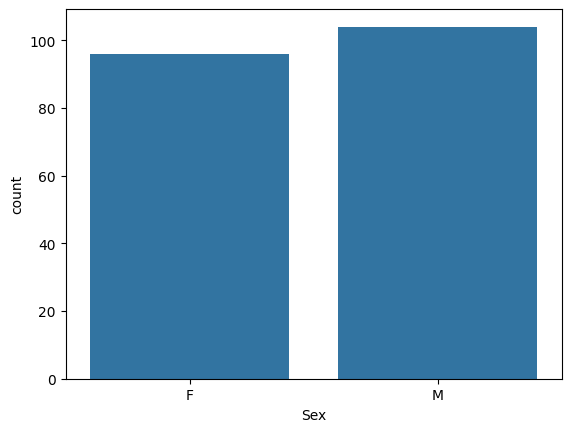

In [14]:
x = df.Sex.value_counts()#this will tells no of male count and female count in the sex data
p = sns.countplot(data=df,x="Sex")
p

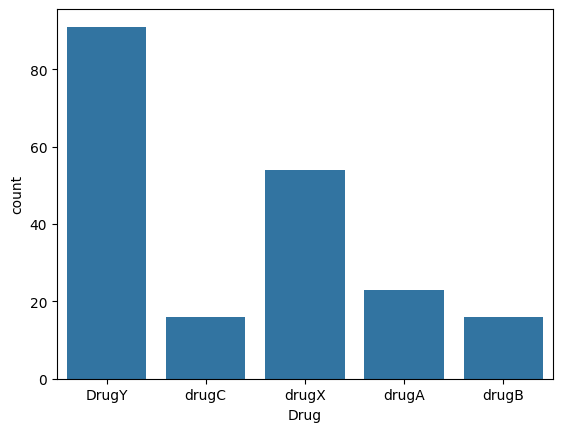

In [16]:
x = df.Drug.value_counts()#this will tells no of male count and female count in the sex data
p = sns.countplot(data=df,x="Drug")
plt.show()

In [18]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

/tmp/ipykernel_8562/2831213875.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']=='drugA']['Age'],color='blue'),
/tmp/ipykernel_8562/2831213875.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Drug']=='drugB']['Age'],color='red'),
/tmp/ipykernel_8562/2831213875.py:4: Us

Text(0.5, 1.0, 'Age vs Drugs')

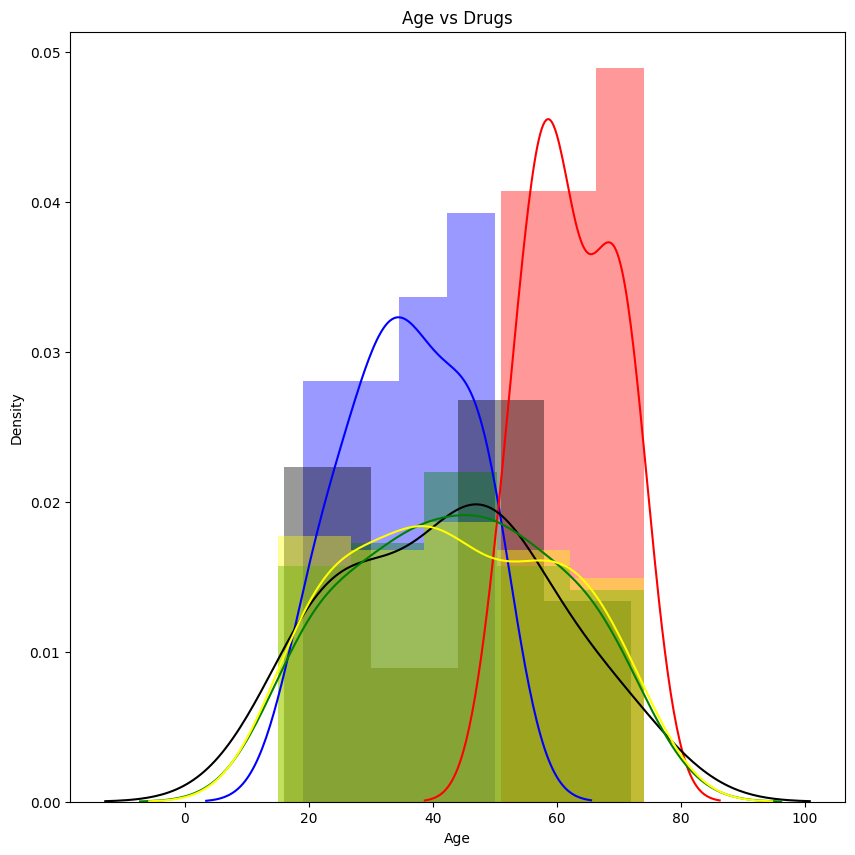

In [29]:

plt.figure(figsize=(10,10))
sns.distplot(df[df['Drug']=='drugA']['Age'],color='blue'),
sns.distplot(df[df['Drug']=='drugB']['Age'],color='red'),
sns.distplot(df[df['Drug']=='drugC']['Age'],color='black'),
sns.distplot(df[df['Drug']=='drugX']['Age'],color="green"),
sns.distplot(df[df['Drug']=='DrugY']['Age'],color='yellow')

plt.title("Age vs Drugs")






Text(0.5, 1.0, 'Age vs Drugs')

<Figure size 1000x1000 with 0 Axes>

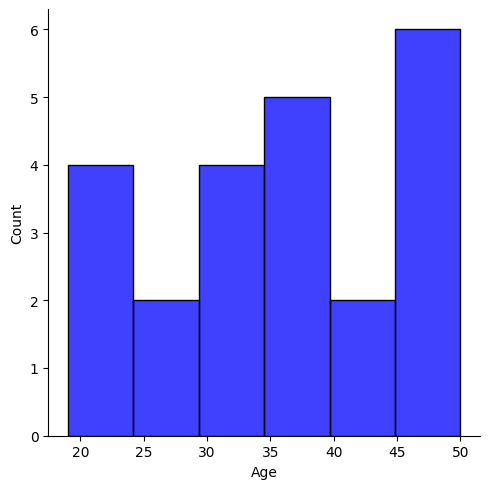

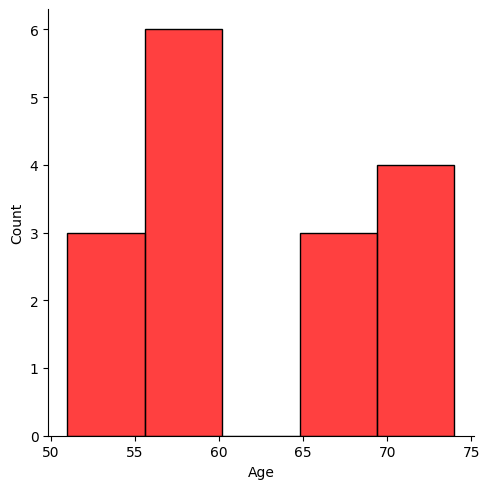

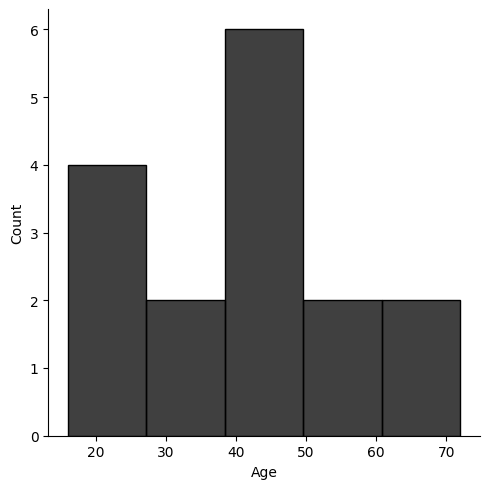

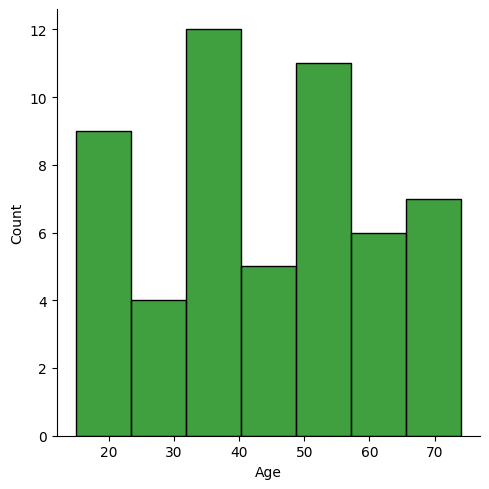

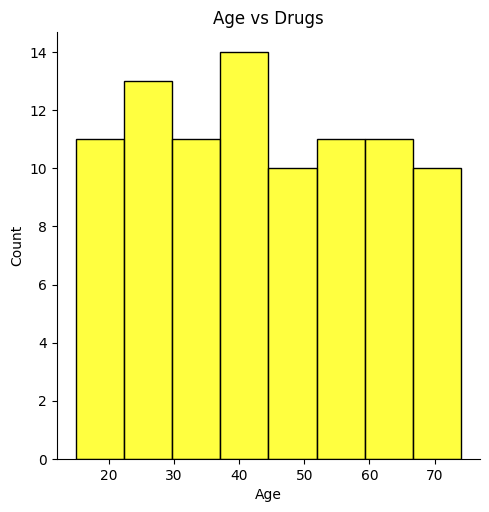

In [30]:
plt.figure(figsize=(10,10))
sns.displot(df[df['Drug']=='drugA']['Age'],color='blue'),
sns.displot(df[df['Drug']=='drugB']['Age'],color='red'),
sns.displot(df[df['Drug']=='drugC']['Age'],color='black'),
sns.displot(df[df['Drug']=='drugX']['Age'],color="green"),
sns.displot(df[df['Drug']=='DrugY']['Age'],color='yellow')

plt.title("Age vs Drugs")

In [35]:
#now we need to convert objects into ints here we use ordinalencoder
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
df['Sex'] = oe.fit_transform(df[['Sex']])
df['BP'] = oe.fit_transform(df[['BP']])
df['Cholesterol'] = oe.fit_transform(df[['Cholesterol']])
df['Drug'] = oe.fit_transform(df[['Drug']])

In [36]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [39]:
#now we need to set the x and y values using the dataset where x contains the dataset and y contains the label
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x,y

(     Age  Sex   BP  Cholesterol  Na_to_K
 0     23  0.0  0.0          0.0   25.355
 1     47  1.0  1.0          0.0   13.093
 2     47  1.0  1.0          0.0   10.114
 3     28  0.0  2.0          0.0    7.798
 4     61  0.0  1.0          0.0   18.043
 ..   ...  ...  ...          ...      ...
 195   56  0.0  1.0          0.0   11.567
 196   16  1.0  1.0          0.0   12.006
 197   52  1.0  2.0          0.0    9.894
 198   23  1.0  2.0          1.0   14.020
 199   40  0.0  1.0          1.0   11.349
 
 [200 rows x 5 columns],
 0      0.0
 1      3.0
 2      3.0
 3      4.0
 4      0.0
       ... 
 195    3.0
 196    3.0
 197    4.0
 198    4.0
 199    4.0
 Name: Drug, Length: 200, dtype: float64)

In [42]:
#to train our data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)


In [43]:
#model creation for decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',random_state=0)
model.fit(xtrain,ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
gini_prediction = model.predict(xtest)
gini_prediction

array([4., 2., 1., 0., 0., 3., 0., 4., 4., 2., 0., 0., 1., 4., 0., 0., 1.,
       1., 4., 0., 0., 0., 4., 1., 0., 1., 3., 2., 4., 1., 3., 4., 0., 2.,
       3., 0., 4., 4., 3., 2.])

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,gini_prediction)
accuracy

0.975

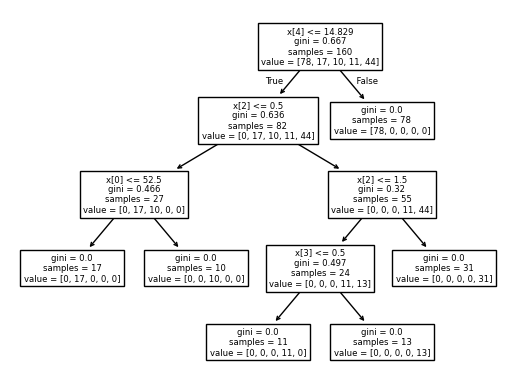

In [47]:
#now we get the accuracy but we need to know the background process between these decison tress
from sklearn import tree
tree.plot_tree(model.fit(xtrain,ytrain))
plt.show()

In [49]:
#now we use another criterion
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model2.fit(xtrain,ytrain)
entro_prediction = model2.predict(xtest)
entro_prediction

array([4., 2., 1., 0., 0., 4., 0., 4., 4., 2., 0., 0., 1., 4., 0., 0., 1.,
       1., 4., 0., 0., 0., 4., 1., 0., 1., 4., 2., 4., 1., 4., 4., 0., 2.,
       4., 0., 4., 4., 4., 2.])

In [50]:
accuracy2 = accuracy_score(ytest,entro_prediction)
accuracy2

0.85

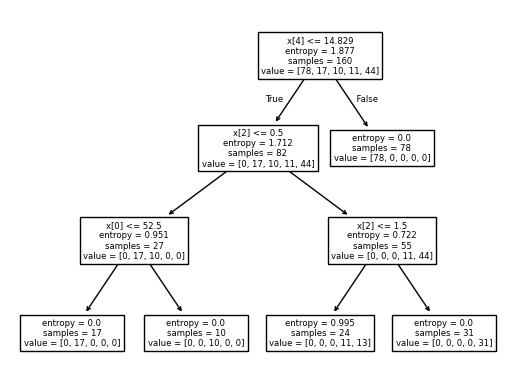

In [51]:
from sklearn import tree
tree.plot_tree(model2.fit(xtrain,ytrain))
plt.show()